# Optimalisasi Anggaran Biaya Pemasaran

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
    * [Tujuan](#tujuan)
    * [Tahapan](#tahap)
* [Tahap 1: Memuat Data](#data1)
    * [Memuat Library](#lib)
    * [Memuat Data](#data2)
* [Tahap 2: Eksplorasi data](#explore)
    * [Dataset Visits](#visits)
    * [Dataset Orders](#orders)
    * [Dataset Costs](#costs)
* [Tahap 3: Pra-pemrosesan data](#pra)
    * [Mengganti Nama Kolom](#name)
    * [Mencari Anomali](#anomali)
* [Tahap 4: Menganalisis Data](#analysis)
    * [Produk](#produk)
        * [Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?](#produk1)
        * [Berapa jumlah sesi per harinya?](#produk2)
        * [Berapa lama durasi untuk setiap sesi?](#produk3)
        * [Seberapa sering pengguna kembali menggunakan produk?](#produk4)
    * [Penjualan](#penjualan)
        * [Kapan orang-orang mulai melakukan pembelian?](#penjualan1)
        * [Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?](#penjualan2)
        * [Berapa besaran rata-rata pembeliannya?](#penjualan3)
        * [Berapa jumlah uang yang mereka kontribusikan? (LTV)](#penjualan4)
    * [Pemasaran](#pemasaran)
        * [Berapa jumlah uang yang dihabiskan?](#pemasaran1)
        * [Berapa biaya akuisisi pelanggan dari masing-masing sumber?](#pemasaran2)
        * [Seberapa menguntungkannya investasi tersebut? (ROMI)](#pemasaran3)
* [Kesimpulan Umum](#end)

## Pendahuluan <a id='intro'></a>

Analisa ini membahas upaya perusahaan Y.Afisha untuk mengoptimalkan anggaran biaya pemasaran dengan cara menganalisa beberapa metrik seperti produk, penjualan, dan pemasaran. Perusahaan ini ingin mengetahui sumber pemasaran yang paling optimal melalui tiga metrik tersebut. Analisa ini sangat penting bagi perusahaan Y.Afisha karena dengan mengetahui sumber pemasaran yang paling optimal, mereka dapat mengalokasikan anggaran pemasaran mereka dengan lebih efektif dan efisien.

Dalam analisa ini, terdapat tiga metrik yang akan diambil data-nya, yaitu produk, penjualan, dan pemasaran. Metrik produk akan membahas mengenai penggunaan produk, termasuk jumlah orang yang menggunakan produk, berapa jumlah sesi per harinya, berapa lama durasi untuk setiap sesi, dan seberapa sering pengguna kembali menggunakan produk. Metrik penjualan akan membahas mengenai perilaku pembelian pelanggan, termasuk kapan orang-orang mulai melakukan pembelian, berapa jumlah pesanan yang mereka buat selama periode waktu tertentu, besaran rata-rata pembelian, dan jumlah uang yang mereka kontribusikan (LTV). Sementara itu, metrik pemasaran akan membahas mengenai efektivitas dari anggaran pemasaran yang dihabiskan, termasuk berapa jumlah uang yang dihabiskan, berapa biaya akuisisi pelanggan dari masing-masing sumber, dan seberapa menguntungkannya investasi tersebut (ROMI).

Dalam analisa ini, akan dilakukan pengolahan data dan analisa terhadap tiga metrik tersebut dengan tujuan untuk mengetahui sumber pemasaran yang paling optimal bagi perusahaan Y.Afisha.

### Tujuan: <a id='tujuan'></a>

Tujuan utama analisa adalah mencari tahu sumber pemasaran yang paling optomal melalui 3 metrik yaitu produk, penjualan, dan pemasaran:

1. Produk:
    - Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
    - Berapa jumlah sesi per harinya?
    - Berapa lama durasi untuk setiap sesi?
    - Seberapa sering pengguna kembali menggunakan produk?
2. Penjualan:
    - Kapan orang-orang mulai melakukan pembelian?
    - Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
    - Berapa besaran rata-rata pembeliannya?
    - Berapa jumlah uang yang mereka kontribusikan? (LTV)
3. Pemasaran:
    - Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu
    - Berapa biaya akuisisi pelanggan dari masing-masing sumber?
    - Seberapa menguntungkannya investasi tersebut? (ROMI)

### Tahapan: <a id='tahap'></a>
 
Proyek ini akan terdiri dari 4 tahap:
 1. Memuat data.
 2. Eksplorasi data.
 3. Pra-pemrosesan data.
 4. Menganalisis data.

## Tahap 1: Memuat Data <a id='data1'></a>

### Memuat Library <a id='lib'></a>

In [327]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

### Memuat Data <a id='data2'></a>

In [328]:
# Memuat dataset pertama
try:
    visits = pd.read_csv(
        'moved_visits_log_us.csv',
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts'],
        )
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv',
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts'],
        )

In [329]:
# Memuat dataset kedua
try:
    orders = pd.read_csv(
        'moved_orders_log_us.csv',
        parse_dates=['Buy Ts']
        )
except:
    orders = pd.read_csv(
        '/datasets/orders_log_us.csv',
        parse_dates=['Buy Ts']
    )

In [330]:
# Memuat dataset ketiga
try:
    costs = pd.read_csv(
        'moved_costs_us.csv',
        parse_dates=['dt']
        )
except:
    costs = pd.read_csv(
        '/datasets/costs_us.csv',
        parse_dates=['dt']
        )

##  Tahap 2: Eksplorasi Data  <a id='explore'></a>

###  Dataset `visits`  <a id='visits'></a>

Tabel `visits` berisikan informasi mengenai log/catatan server yang memuat data kunjungan ke situs web dengan kolom sebagai berikut:

- `Uid` — ID pengguna.
- `Device ` — Perangkat pengguna.
- `Start Ts` — Tanggal dan waktu dimulainya sesi.
- `End Ts` — Tanggal dan waktu berakhirnya sesi.
- `Source Id` — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web.

In [331]:
# Memeriksa 5 data teratas
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [332]:
# Melihat ukuran datasetnya
visits.shape

(359400, 5)

In [333]:
# Memeriksa informasi umumnya
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [334]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [335]:
# Menghitung nilai yang hilang
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [336]:
# Memeriksa apakah ada data yang terduplikasi
visits.duplicated().sum()

0

**Findings:**

Setiap baris dalam tabel menyimpan berbagai informasi mengenai log/catatan server yang memuat data kunjungan ke situs web seperti ID pengguna, perangkat pengguna, tanggal dan waktu dimulainya sesi, tanggal dan waktu berakhirnya sesi, dan ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web.

Dari informasi di atas didapatkan gambaran sebagai berikut:
- Dataset memiliki ukuran sebesar **359400** baris dan **5** kolom.
- Nama kolom perlu dirubah aga terlihat lebih rapih dan lebih mudah dalam penulisan kodenya.
- Pada saat memuat datantya, kolom `Device` telah diubah menjadi tipe `category` untuk memperkecil beban memory. 
- Begitu pula dengtan kolom `End Ts` dan `Start Ts`, tipe datanya telah dirubah pada saat memuat data menjadi tipe `datetime64[ns]`.

###  Dataset `orders`  <a id='orders'></a>

Tabel `orders` berisikan data terkait pesanan dengan kolom sebagai berikut:

- `Uid` — ID pengguna yang membuat pesanan.
- `Buy Ts` — Tanggal dan waktu pesanan dibuat.
- `Revenue` — Pendapatan Y.Afisha dari pesanan tersebut.

In [337]:
# Memeriksa 5 data teratas
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [338]:
# Melihat ukuran datasetnya
orders.shape

(50415, 3)

In [339]:
# Memeriksa informasi umumnya
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [340]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [341]:
# Menghitung nilai yang hilang
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [342]:
# Memeriksa apakah ada data yang terduplikasi
orders.duplicated().sum()

0

**Findings:**

Setiap baris dalam tabel menyimpan berbagai informasi mengenai log/catatan server yang memuat data kunjungan ke situs web seperti ID pengguna yang membuat pesanan, tanggal dan waktu pesanan dibuat, dan pendapatan Y.Afisha dari pesanan tersebut.


Dari informasi di atas didapatkan gambaran sebagai berikut:
- Dataset memiliki ukuran sebesar **50415** baris dan **3** kolom.
- Nama kolom perlu dirubah aga terlihat lebih rapih dan lebih mudah dalam penulisan kodenya.
- Pada saat memuat datantya, kolom `Buy Ts` telah diubah menjadi tipe `datetime64[ns]`.

###  Dataset `cost`  <a id='costs'></a>

Tabel `costs` berisikan informasi terkait pengeluaran pemasaran dengan kolom sebagai berikut:

- `source_id` — ID sumber iklan.
- `dt` — Tanggal.
- `costs ` — Pengeluaran untuk sumber iklan pada tanggal tersebut.

In [343]:
# Memeriksa 5 data teratas
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [344]:
# Melihat ukuran datasetnya
costs.shape

(2542, 3)

In [345]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [346]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [347]:
# Menghitung nilai yang hilang
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [348]:
# Memeriksa apakah ada data yang terduplikasi
costs.duplicated().sum()

0

**Findings:**

Setiap baris dalam tabel menyimpan berbagai informasi mengenai log/catatan server yang memuat data kunjungan ke situs web seperti ID sumber iklan, tanggal, dan pengeluaran untuk sumber iklan pada tanggal tersebut.


Dari informasi di atas didapatkan gambaran sebagai berikut:
- Dataset memiliki ukuran sebesar **2542** baris dan **3** kolom.
- Pada saat memuat datantya, kolom `dt` telah diubah menjadi tipe `datetime64[ns]`.

## Tahap 3: Pra-pemrosesan Data <a id='pra'></a>

### Mengganti Nama Kolom <a id='name'></a>


Nama kolom dirubah menjadi *lowercase* dan menggunakan *Snake Case* untuk memudahkan proses penulisan kode.

In [349]:
# Mengganti nama kolom dataset 'visits'
visits.columns = ['device', 'session_end', 'source_id', 'session_start', 'uid']

In [350]:
# Mengganti nama kolom dataset 'orders'
orders.columns = ['buy_ts', 'revenue', 'uid']

### Mencari Anomali <a id='anomali'></a>


Sebelum melanjutkan proses analisa, pastikan tidak ada anomali pada data:

In [351]:
# Mencari anomali
visits[visits['session_start'] > visits['session_end']]

,device,session_end,source_id,session_start,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Terdapat anomali pada data dimana terdapat 2 baris yang nilai `session_start`-nya lebih besar dari `session_end`, hal ini cuklup ganjil karena seharusnya waktu dimulainya sesi dilakukan sebelum waktu berakhirnya sesi.

Karena hanya terdapat 2 baris data, maka anomali bisa dihilangkan.

In [352]:
# Menghapus anomali
visits = visits[visits['session_start'] <= visits['session_end']]

**Kesimpulan Sementara:**

- Nama kolom pada dataset telah dirubah menjadi *lowercase* dan menggunakan *Snake Case*.
- Terdapat 2 data anomali yang kemudian dihapus.

## Tahap 4: Menganalisis Data <a id='analysis'></a>

### Produk <a id='produk'></a>


Metrik pertama yang akan dianalisa adalah produk, pada metrik ini akan dicari tahu beberapa hal sebagai berikut:
- Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
- Berapa jumlah sesi per harinya?
- Berapa lama durasi untuk setiap sesi?
- Seberapa sering pengguna kembali menggunakan produk?

#### Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan? <a id='produk1'></a>

In [353]:
# Melihat kembali dataset `visits`
visits.head()

,device,session_end,source_id,session_start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Dikarenakan pertanyaan kali ini adalah mencari tahu jumlah pengguna setiap hari, minggu, dan bulan, maka perlu dilakukan pengambilan informasi yang dibutuhkan:

In [354]:
# Mengambil informasi waktu tertentu dari data

# Mengambil informasi tahun
visits['session_year']  = visits['session_start'].dt.year

# Mengambil informasi bulan
visits['session_month'] = visits['session_start'].dt.month

# Mengambil informasi minggu
visits['session_week']  = visits['session_start'].dt.week

# Mengambil informasi hari
visits['session_date'] = visits['session_start'].dt.date

In [355]:
# Melihat hasilnya
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [356]:
# Menghitung jumlah DAU
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

# Menghitung jumlah WAU
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()

# Menghitung jumlah MAU
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

print('Jumlah user yang menggunakan produk setiap hari adalah sebanyak', int(dau_total), 'user')
print('Jumlah user yang menggunakan produk setiap minggu adalah sebanyak', int(wau_total), 'user')
print('Jumlah user yang menggunakan produk setiap bulan adalah sebanyak', int(mau_total), 'user')

Jumlah user yang menggunakan produk setiap hari adalah sebanyak 907 user
Jumlah user yang menggunakan produk setiap minggu adalah sebanyak 5825 user
Jumlah user yang menggunakan produk setiap bulan adalah sebanyak 23228 user


**Findings:**

- Jumlah user yang menggunakan produk setiap hari adalah sebanyak **907** user.
- Jumlah user yang menggunakan produk setiap minggu adalah sebanyak **5825** user.
- Jumlah user yang menggunakan produk setiap bulan adalah sebanyak **23228** user.

Temuan ini memberikan gambaran tentang seberapa sering pengguna mengakses produk dan dapat digunakan sebagai acuan dalam pengembangan strategi pemasaran serta perbaikan produk. Informasi ini dapat membantu perusahaan untuk memperkuat dan meningkatkan hubungan dengan pengguna setia, serta untuk menarik lebih banyak pengguna baru dengan melakukan penyesuaian atau peningkatan pada fitur dan fungsionalitas produk. Selain itu, hasil ini juga dapat menjadi indikator dalam mengukur performa dan pertumbuhan produk.

#### Berapa jumlah sesi per harinya? <a id='produk2'></a>

In [357]:
# Melihat kembali dataset `visits`
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [358]:
# Membuat dataset sesi per-pengguna
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'uid': ['count', 'nunique']}
)

# Mengganti nama kolomnya
sessions_per_user.columns = ['n_sessions', 'n_users']

# Menghitung sesi per-pengguna
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

In [359]:
sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35677    27473           1.298620
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653

<AxesSubplot: xlabel='session_year,session_month'>

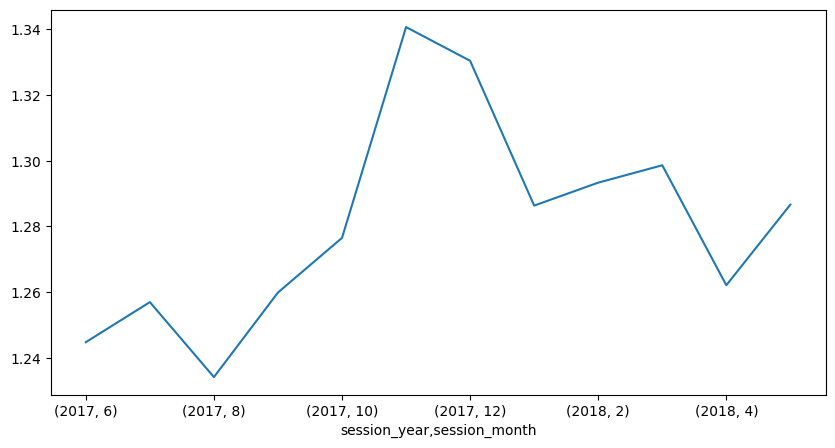

In [360]:
# Membuat grafiknya
sessions_per_user['sessions_per_user'].plot(kind='line', figsize=(10,5))

**Findings:**

Rata-rata sesi yang dilakukan tiap pengguna adalah satu sesi perhari.

#### Berapa lama durasi untuk setiap sesi? <a id='produk3'></a>

In [361]:
# Melihat kembali dataset `visits`
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [362]:
# Menghitung durasi tiap sesi dalam detik
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds

In [363]:
# Melihat hasilnya
visits.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [364]:
visits['session_duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

<AxesSubplot: >

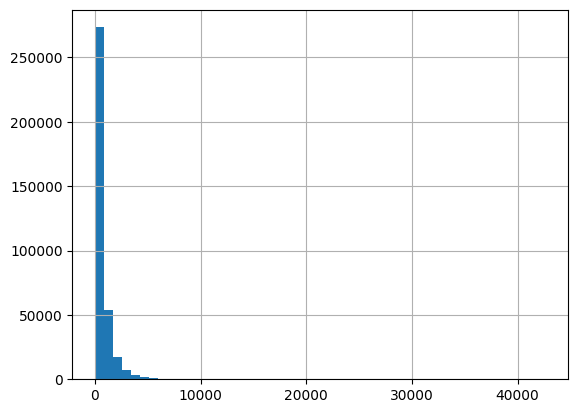

In [365]:
# Membuat grafiknya
visits['session_duration_sec'].hist(bins=50) 

In [366]:
print('Rata-rata durasi sesi adalah', round(visits['session_duration_sec'].mean()), 'detik')
print('Median durasi sesi adalah', round(visits['session_duration_sec'].median()), 'detik')
print('Modus durasi sesi adalah', round(visits['session_duration_sec'].mode()[0]), 'detik')

Rata-rata durasi sesi adalah 643 detik
Median durasi sesi adalah 300 detik
Modus durasi sesi adalah 60 detik


**Findings:**

- Rata-rata durasi sesi adalah **643** detik.
- Median durasi sesi adalah **300** detik.
- Modus durasi sesi adalah **60** detik.

Temuan ini memberikan gambaran yang cukup jelas mengenai durasi sesi pengguna dan dapat digunakan sebagai acuan dalam melakukan evaluasi dan pengembangan layanan. Perusahaan dapat menggunakan informasi ini untuk meningkatkan pengalaman pengguna dan meningkatkan durasi sesi pada layanan mereka dengan menyesuaikan fitur dan fungsionalitas pada layanan.

#### Seberapa sering pengguna kembali menggunakan produk? <a id='produk4'></a>

Sebelum melakukan analisis, perlu dilalukan pengambilan informasi mengenai sesi pertama setiap pengguna. Informasi ini akan dimasukan kedalam dataset baru `first_visits`.

In [367]:
# Membuat dataset baru
first_visits = visits.groupby('uid').agg({'session_start': 'min'}).reset_index()

# Mengubah nama kolom
first_visits.columns = ['uid', 'first_session_start']

In [368]:
# Melihat datasetnya
first_visits.head()

,uid,first_session_start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [369]:
# Mengambil informasi waktu tertentu dari data

# Mengambil informsi tanggal
first_visits['first_session_date'] = first_visits['first_session_start'].dt.date

# Mengambil informasi minggu
first_visits['first_session_week']  = first_visits['first_session_start'].values.astype('datetime64[W]')

# Mengambil informasi bulan
first_visits['first_session_month'] = first_visits['first_session_start'].values.astype('datetime64[M]')

# Mengambil informasi tahun
first_visits['first_session_year']  = first_visits['first_session_start'].values.astype('datetime64[Y]')

In [370]:
# Melihat hasilnya
first_visits.head()

,uid,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018-01-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018-01-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017-01-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017-01-01


Menggabungkan dataset `first_visits` dengan dataset `visits` dan dimasukan kedalam dataset baru `visits_merge`.

In [371]:
# Menggabungkan dataset
visits_merge = pd.merge(visits, first_visits, on='uid')

# Menghitung durasi sesi antara kunjungan pertama dan kunjungan berikutnya
visits_merge['age_days'] = (visits_merge['session_date'] - visits_merge['first_session_date']).dt.days
visits_merge['age_months'] = round(visits_merge['age_days'] / 30).astype('int')

In [372]:
# Melihat hasilnya
visits_merge.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,0,0


In [373]:
# Membuat analisis kohort
cohorts = visits_merge.pivot_table(
    index='first_session_month',
    columns='age_months',
    values='uid',
    aggfunc='nunique'
)

In [374]:
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [375]:
# Menghitung tingkat retensi
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]*100], axis=1)
retention.columns = cohorts.columns

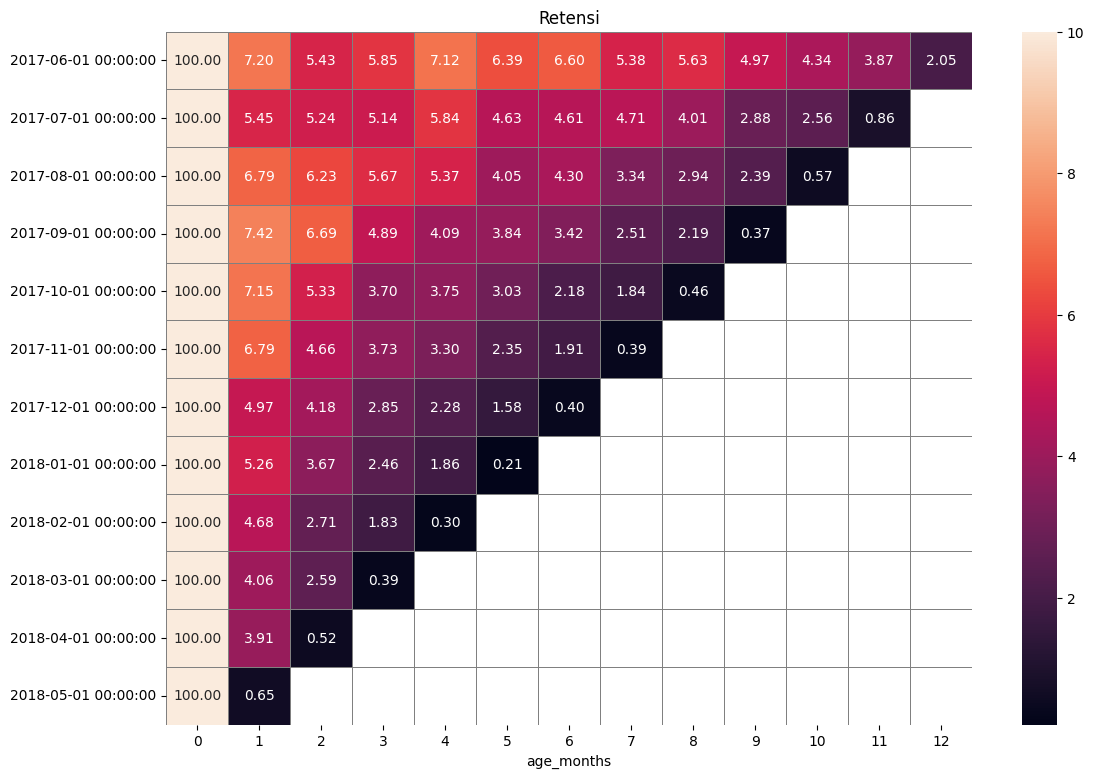

In [376]:
# Melihat grafiknya
plt.figure(figsize=(13, 9))
plt.title('Retensi')
sns.heatmap(
    retention,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    linecolor='grey',
    vmax=10
);

In [377]:
retention.mean()

age_months
0     100.000000
1       5.361101
2       4.294895
3       3.649332
4       3.768995
5       3.259808
6       3.344964
7       3.029164
8       3.045381
9       2.651628
10      2.492865
11      2.364520
12      2.051437
dtype: float64

**Findings:**

Berdasarkan hasil analisis data, tingkat retensi rata-rata pengguna bulanan menunjukkan penurunan secara signifikan seiring dengan peningkatan jumlah bulan. Dalam data tersebut, pada bulan pertama, tingkat retensi pengguna mencapai 100% (angka dasar). Namun, pada bulan kedua, tingkat retensi pengguna menurun menjadi 5.36%, dan pada bulan ketiga, tingkat retensi pengguna menurun menjadi 4.29%.

Pada bulan keempat, tingkat retensi pengguna terlihat meningkat menjadi 3.77%, namun kembali menurun pada bulan kelima menjadi 3.26%. Begitu seterusnya hingga bulan ke-12, di mana tingkat retensi pengguna turun menjadi 2.05%.

Temuan ini menunjukkan bahwa penggunaan produk memiliki tingkat retensi yang rendah dalam jangka waktu yang lebih panjang. Perusahaan perlu melakukan peningkatan atau perbaikan pada produk agar pengguna lebih tertarik dan setia dalam menggunakan produk tersebut dalam jangka waktu yang lebih panjang. Perusahaan dapat melakukan pengembangan fitur dan fungsionalitas baru yang lebih menarik, serta memperbaiki kualitas produk dan pelayanan agar pengguna merasa puas dengan pengalaman menggunakan produk. Selain itu, perusahaan juga dapat melakukan program promosi atau penawaran yang menarik untuk mempertahankan pengguna.

### Penjualan <a id='penjualan'></a>


Metrik Kedua yang akan dianalisa adalah penjualan, pada metrik ini akan dicari tahu beberapa hal sebagai berikut:
- Kapan orang-orang mulai melakukan pembelian?
- Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
- Berapa besaran rata-rata pembeliannya?
- Berapa jumlah uang yang mereka kontribusikan? (LTV)

#### Kapan orang-orang mulai melakukan pembelian? <a id='penjualan1'></a>

In [378]:
# Melihat kembali data `orders`
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Sebelum melakukan analisis, perlu dilalukan pengambilan informasi mengenai pembelian pertama setiap pengguna. Informasi ini akan dimasukan kedalam dataset baru `first_orders`.

In [379]:
# Membuat dataset baru
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()

# Mengganti nama kolomnya
first_orders.columns = ['uid', 'first_buy_ts']

In [380]:
# Melihat datanya
first_orders.head()

,uid,first_buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [381]:
# Mengambil informasi waktu tertentu dari data

# Mengambil informsi tanggal
first_orders['first_buy_date'] = first_orders['first_buy_ts'].dt.date

# Mengambil informasi minggu
first_orders['first_buy_week']  = first_orders['first_buy_ts'].values.astype('datetime64[W]')

# Mengambil informasi bulan
first_orders['first_buy_month'] = first_orders['first_buy_ts'].values.astype('datetime64[M]')

# Mengambil informasi tahun
first_orders['first_buy_year']  = first_orders['first_buy_ts'].values.astype('datetime64[Y]')

In [382]:
# Melihat kembali datanya
first_orders.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


Menggabungkan dataset `first_orders` dengan dataset `first_visits` dan dimasukan kedalam dataset baru `first_buy`.

In [383]:
# Membuat dataset baru
first_buy = first_orders.merge(first_visits, on='uid')
first_buy.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


In [384]:
# Melihat informasi umumnya
first_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_buy_ts         36523 non-null  datetime64[ns]
 2   first_buy_date       36523 non-null  object        
 3   first_buy_week       36523 non-null  datetime64[ns]
 4   first_buy_month      36523 non-null  datetime64[ns]
 5   first_buy_year       36523 non-null  datetime64[ns]
 6   first_session_start  36523 non-null  datetime64[ns]
 7   first_session_date   36523 non-null  object        
 8   first_session_week   36523 non-null  datetime64[ns]
 9   first_session_month  36523 non-null  datetime64[ns]
 10  first_session_year   36523 non-null  datetime64[ns]
dtypes: datetime64[ns](8), object(2), uint64(1)
memory usage: 3.3+ MB


Kolom `first_buy_date` dan `first_session_date` masih berupa `object`, artinya tipe data tersebut masih belum tepat. Maka perlu diubah tipe datanya menjadi `datetime`.

In [385]:
# Merubah tipe datanya
first_buy['first_buy_date'] = pd.to_datetime(first_buy['first_buy_date'])
first_buy['first_session_date'] = pd.to_datetime(first_buy['first_session_date'])

Membuat kolom baru yang berisikan informasi mengenai pembelian pertama pengguna setelah dimulainya sesi pertama pengguna, dan menyimpannya dalam kolom `first_purchase_days`.

In [386]:
# Membuat kolom baru `first_purchase_days`
first_buy['first_purchase_days'] = (first_buy['first_buy_date'] - first_buy['first_session_date']).dt.days

In [387]:
# Melihat hasilnya
first_buy.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,first_purchase_days
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


<AxesSubplot: >

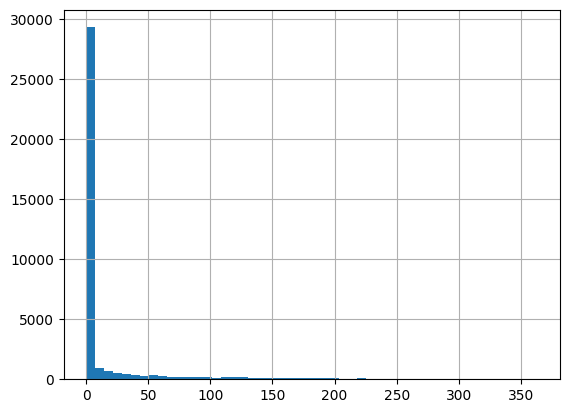

In [388]:
# Membuat Histogramnya
first_buy['first_purchase_days'].hist(bins=50) 

In [389]:
first_buy['first_purchase_days'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: first_purchase_days, dtype: float64

**Findings:**

- Kebanyakan pengguna melakukan pembelian di hari ke-0, artinya mereka melakukan pembelian pada hari yang sama saat sesi pertama dilakukan.
- Rata-rata pengguna melakukan pembelian pertama setelah 16 hari semenjak sesi pertama dilakukan.
- Waktu tercepat pengguna dalam melakukan pembelian adalah pada hari yang sama saat sesi pertama dilakukan.
- Uniknya waktu maksimal pengguna dalam melakukan pembelian adalah pada hari ke 363, artinya mereka melakukan pembelian pada hari ke-363 atau hampir satu tahun setelah dilakukannya sesi pertama.

#### Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu? <a id='penjualan2'></a>

In [390]:
# Melihat kembali dataset `orders`
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [391]:
# Mengambil informasi waktu tertentu dari data

# Mengambil informsi tanggal
orders['buy_date'] = orders['buy_ts'].dt.date

# Mengambil informasi minggu
orders['buy_week']  = orders['buy_ts'].values.astype('datetime64[W]')

# Mengambil informasi bulan
orders['buy_month'] = orders['buy_ts'].values.astype('datetime64[M]')

# Mengambil informasi tahun
orders['buy_year']  = orders['buy_ts'].values.astype('datetime64[Y]')

In [392]:
# Melihat kembali datanya
orders.head()

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01


Membuat data yang berisikan jumlah pembeli dan jumlah revenue:

In [393]:
# Membuat dataset agregasi
orders_agg = orders.groupby('buy_month').agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})

# Mengubah nama kolomnya
orders_agg.columns = ['transaction_count', 'revenue_sum']

In [394]:
# Melihat datasetnya
orders_agg

,transaction_count,revenue_sum
buy_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


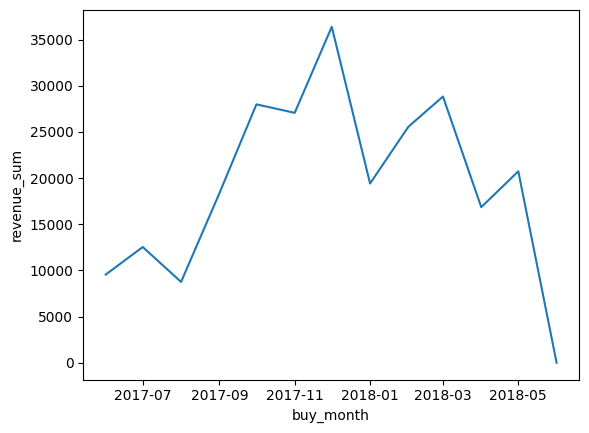

In [395]:
# Membuat grafik Revenue
sns.lineplot(orders_agg['revenue_sum']);

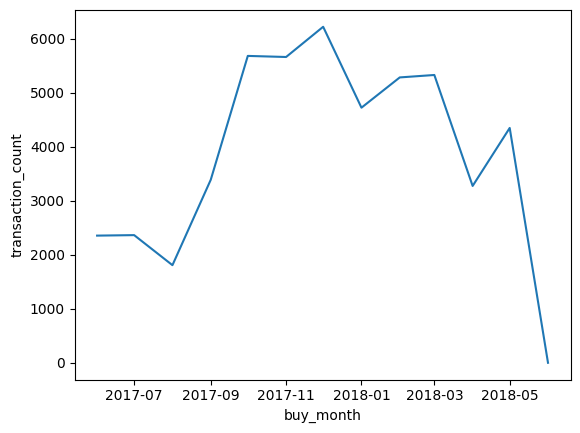

In [396]:
# Membuat grafik `transaction_count`
sns.lineplot(orders_agg['transaction_count']);

In [397]:
orders_agg.describe()

,transaction_count,revenue_sum
count,13.000000,13.000000
mean,3878.076923,19389.015385
std,1858.113401,9962.071481
min,1.000000,3.420000
25%,2363.000000,12539.470000
50%,4346.000000,19417.130000
75%,5326.000000,27069.930000
max,6218.000000,36388.600000


**Findings:**

Berdasarkan data diatas, terlihat bahwa jumlah pesanan yang dibuat setiap bulannya mengalami fluktuasi yang cukup signifikan. Pada bulan-bulan awal, jumlah pesanan cenderung stabil, tetapi pada bulan Oktober 2017, terjadi kenaikan yang cukup signifikan dari sekitar 3.400 menjadi 5.679 pesanan. Hal ini mungkin disebabkan oleh faktor promosi atau kebijakan harga yang menarik pada bulan tersebut.

Selanjutnya, jumlah pesanan cenderung menurun pada bulan-bulan berikutnya hingga Februari 2018, sebelum kembali meningkat pada bulan-bulan terakhir. Meski demikian, terlihat adanya fluktuasi pada data bulan Juni 2018, yang hanya tercatat satu pesanan dengan total pendapatan sebesar 3,42. Data ini mungkin perlu diverifikasi kembali untuk memastikan keakuratannya.

Secara keseluruhan, terlihat adanya fluktuasi pada jumlah pesanan yang dibuat selama periode waktu retensi. Untuk mempertahankan pertumbuhan bisnis yang sehat, perlu dilakukan analisis yang lebih mendalam untuk mengidentifikasi faktor apa yang mempengaruhi fluktuasi ini dan bagaimana cara mengatasi fluktuasi tersebut.

#### Berapa besaran rata-rata pembeliannya? <a id='penjualan3'></a>

Untuk mencari tahu pembelian rata-rata, perlu dilakukan penghitungan menggunakan `mean()` pada kolom `revenue` di dataset `orders`:

In [398]:
print('Rata-rata pembelian adalah sebesar:', round(orders['revenue'].mean()))

Rata-rata pembelian adalah sebesar: 5


**Findings:**

Rata-rata besaran pembelian pengguna adalah sebesar **5**.

#### Berapa jumlah uang yang mereka kontribusikan? (LTV) <a id='penjualan4'></a>

In [399]:
# Melihat kembali dataset `fist_orders`
first_orders.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01


In [400]:
# Membuat kohort
cohort_sizes = first_buy.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns= ['first_buy_month', 'n_buyers']

In [401]:
# Melihat hasilnya
cohort_sizes

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Dataset yang baru telah dibuat, berisikan data kohort berdasarkan pembelian pertama pengguna dan jumlah pembeli dan disimpan dalam dataset `cohort_sizes`.

Kemudian dibuat dataset kedua yang berisikan berisikan data kohort berdasarkan pembelian pertama pengguna, bulan, dan revenue. Yang kemudian disimpan dalam dataset `cohorts`:

In [402]:
# Menambahkan bulan pertama pembelian
cohorts = orders.merge( first_buy, how='inner', on='uid')
cohorts_agg = cohorts.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()

In [403]:
# Meliohat hasilnya
cohorts_agg.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Selanjutnya dilakukan penghitungan usia kohort dalam bulan:

In [404]:
# Menghitung usia cohort
cohorts_agg['age_month'] = (cohorts_agg['buy_month'] - cohorts_agg['first_buy_month']).dt.days
cohorts_agg['age_month'] = round(cohorts_agg['age_month'] / 30, 0).astype('int')

In [405]:
cohorts_agg.head()

,first_buy_month,buy_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4


Menggabungkan dataset `cohort_sizes` dan `cohorts_agg`:

In [406]:
# Menggabungkan dataset
cohort_reports = cohort_sizes.merge(cohorts_agg, on= 'first_buy_month')

Rumus LTV adalah LTV = Gross Profit (GP) / n_buyers

Sedangkan rumus GP adalah GP = Revenue * Margin Rate

Karena margin rate tidak diketahui, maka GP tidak dapat dihitung. Oleh karenanya, pada kasus kali ini akan digunakan Revenue sebagai pengganti GP.

In [407]:
# Menghitung LTV
cohort_reports['ltv'] = cohort_reports['revenue'] / cohort_reports['n_buyers']

In [408]:
# Melihat hasilnya
cohort_reports.head()

,first_buy_month,n_buyers,buy_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [409]:
# Membuat analisis kohort
cohorts_ltv = cohort_reports.pivot_table(
    index='first_buy_month',
    columns='age_month',
    values='ltv',
    aggfunc='mean'
).cumsum(axis=1)

In [410]:
cohorts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


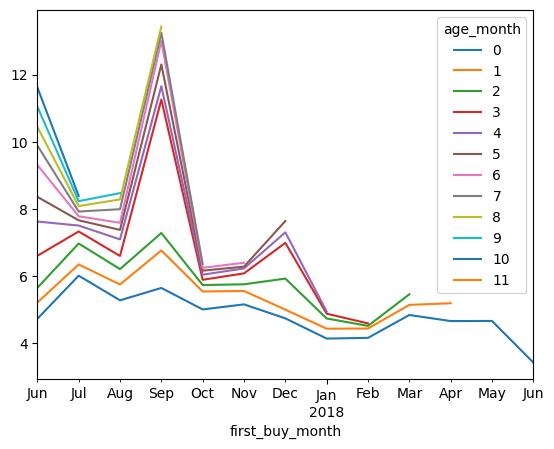

In [411]:
cohorts_ltv.plot();

**Findings**

Dapat dilihat bahwa kohort pertama (yang melakukan pembelian pertama pada bulan Juni 2017) memiliki nilai LTV yang terus meningkat dari waktu ke waktu, dengan nilai tertinggi mencapai 11.88 pada bulan ke-11.

Sementara itu, kohort-kohort berikutnya cenderung memiliki nilai LTV yang lebih rendah dibandingkan kohort pertama. Namun, kohort yang melakukan pembelian pertama pada bulan September 2017 memiliki nilai LTV yang sangat tinggi pada bulan ke-3, mencapai 11.26, kemudian menurun secara signifikan pada bulan ke-4 dan 5.

Pada umumnya, nilai LTV untuk setiap kohort cenderung menurun dari waktu ke waktu, dengan beberapa kohort memiliki penurunan yang lebih signifikan dibandingkan kohort lainnya. Hal ini dapat disebabkan oleh faktor-faktor seperti perubahan preferensi konsumen, persaingan yang semakin ketat, dan faktor ekonomi yang memengaruhi keputusan konsumen dalam melakukan pembelian.

### Pemasaran <a id='pemasaran'></a>

Metrik ketiga yang akan dianalisa adalah pemasaran, pada metrik ini akan dicari tahu beberapa hal sebagai berikut:

- Berapa jumlah uang yang dihabiskan?
- Berapa biaya akuisisi pelanggan dari masing-masing sumber?
- Seberapa menguntungkannya investasi tersebut? (ROMI)

#### Berapa jumlah uang yang dihabiskan? <a id='pemasaran1'></a>

Menghitung jumlah keseluruhan uang yang dihabiskan, jumlah uang yang dihabiskan dari waktu ke waktu, dan jumlah uang yang dihabiskan berdasarkan sumbernya.

Yang pertama adalah jumlah keseluruhan uang yang dihabiskan:

In [412]:
# Melihat kembali dataset `costs`
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [413]:
# Menghitung cost keseluruhan
print('Total Costs {}'.format(costs['costs'].sum()))

Total Costs 329131.62


Jumlah uang yang dihabiskan secara keseluruhan adalah sebanyak **329131.62**.

Selanjutnya jumlah uang yang dihabiskan dari waktu ke waktu:

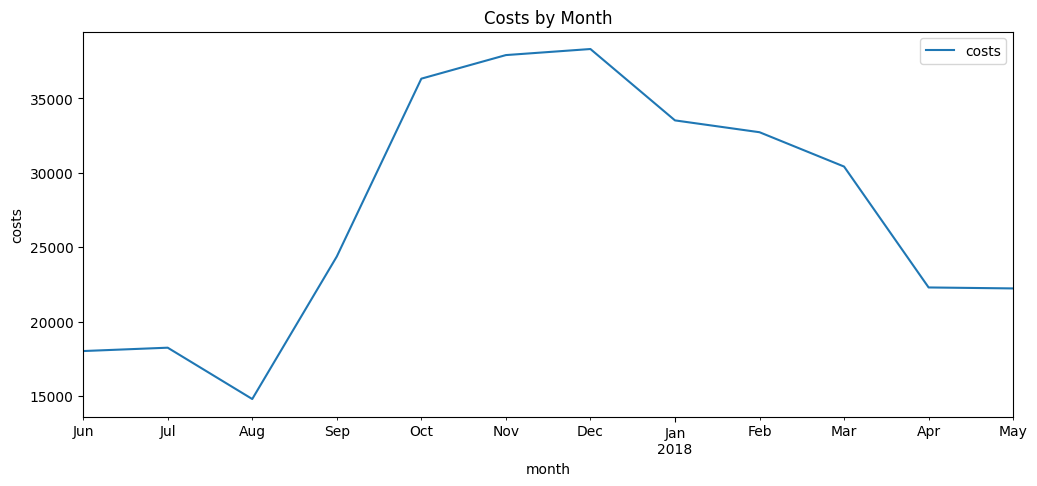

In [414]:
# Menghitung cost bulanan
costs['costs_month'] = costs['dt'].values.astype('datetime64[M]')

costs.pivot_table(index='costs_month',
    values='costs', aggfunc='sum').plot(figsize=(12,5), title='Costs by Month', xlabel='month', ylabel='costs')
plt.show()

In [415]:
# Menghitung cost bedasarkan sumbernya
costs.groupby('source_id').agg({'costs':'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


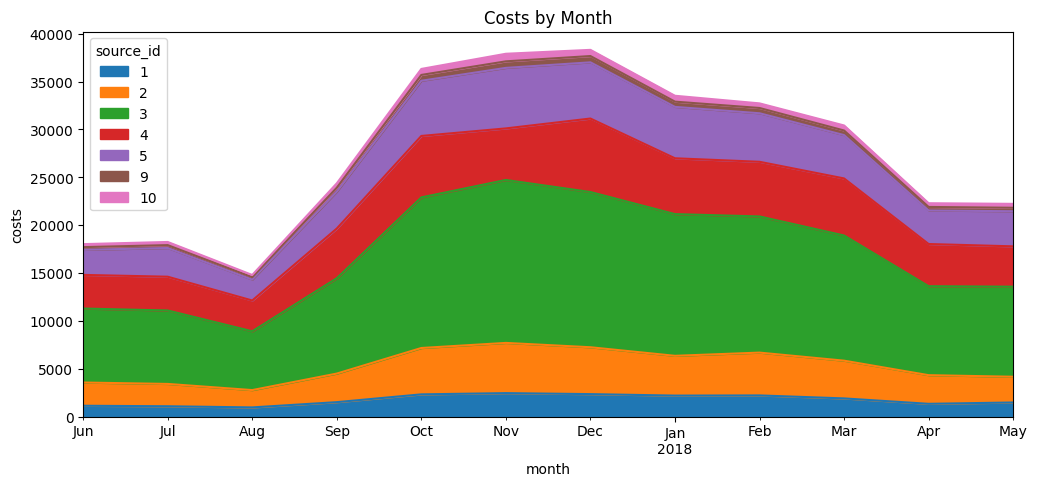

In [416]:
# Membuat grafiknya
costs.pivot_table(index='costs_month', columns='source_id',
    values='costs', aggfunc='sum').plot.area(figsize=(12,5), title='Costs by Month', xlabel='month', ylabel='costs')
plt.show()

**Findings:**

Dari data diatas, terlihat bahwa jumlah uang yang dihabiskan secara keseluruhan adalah sebanyak 329131.62. Dengan sumber nomor 3 yang menjadi sumber dengan jumlah uang yang dihabiskan pelanggan tertinggi yaitu sebesar 141,321.63. Sumber nomor 2 juga memiliki jumlah uang yang cukup tinggi yaitu sebesar 42,806.04. Sedangkan sumber nomor 1, 4, dan 5 memiliki jumlah uang yang dihabiskan pelanggan yang relatif seimbang di antara ketiganya yaitu sekitar 20-60 ribu.

Sumber nomor 9 dan 10 merupakan sumber dengan jumlah uang yang dihabiskan pelanggan paling rendah, yaitu sebesar 5,517.49 dan 5,822.49. Hal ini mungkin disebabkan oleh beberapa faktor, seperti kurangnya efektivitas promosi dari sumber tersebut, kurangnya popularitas, atau kurangnya kepercayaan dari pelanggan terhadap sumber tersebut.

#### Berapa biaya akuisisi pelanggan dari masing-masing sumber? <a id='pemasaran2'></a>

Untuk menghitung CAC (Customer Acquisition Cost), Biaya yang telah dikeluarkan untuk mendapatkan pelanggan baru perlu dibagi dengan jumlah pelanggan baru yang berhasil diakuisisi dalam periode waktu tertentu.

Berikut ini adalah rumus untuk menghitung CAC:

CAC = Total biaya pemasaran / Jumlah pelanggan baru

Maka dibutuhkan data biaya pemasaran yang didapatkan dari dataset `costs` dan jumlah pelanggan dari dataset `orders`.

In [417]:
# Melihat kembali dataset `costs`
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [418]:
# Melihat kembali dataset `orders`
orders.head()

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-01-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-01-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-01-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-01-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-01-01


In [419]:
# Menghitung CAC keseluruhan
print('CAC keseluruhan adalah sebesar:', round(costs['costs'].sum() / orders['uid'].nunique(), 2))

CAC keseluruhan adalah sebesar: 9.01


Biaya akuisisi pelanggan secara keseluruhan adalah sebesar: 9.01

Untuk menemukan biaya akuisisi pelanggan dari masing-masing sumber dibutuhkan informasi mengenai pengguna dan ID sumbernya.

In [420]:
# Melihat data `visits_merge`
visits_merge.head()

,device,session_end,source_id,session_start,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,0,0


In [421]:
# Mendapatkan informasi ID sumber masing-masing pengguna
buyers = visits_merge.sort_values('session_start').groupby('uid').first()
buyers = buyers[['source_id']]


In [422]:
# Melihat hasilnya
buyers.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


Selanjutnya dataset `buyers` akan digabungkan dengan dataset yang sebelumnya telah dibuat yaitu `first_buy`:

In [423]:
# Melihat kembali dataset `first_buy`
first_buy.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,first_purchase_days
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0


In [424]:
# Mengabungkan dataset `buyers` dengan `first_buy`
buyers = pd.merge(first_buy, buyers, left_on='uid', right_index=True)
buyers.head()

,uid,first_buy_ts,first_buy_date,first_buy_week,first_buy_month,first_buy_year,first_session_start,first_session_date,first_session_week,first_session_month,first_session_year,first_purchase_days,source_id
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2017-12-28,2018-01-01,2018-01-01,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,107,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,0,10
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,0,3
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-25,2018-01-01,2018-01-01,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,1,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,0,5


Dari dataset `buyers`, kemudian akan dihitung jumlah pelanggan baru per-hari berdasarkan sumbernya.

In [425]:
# Menghitung jumlah pengguna baru per-hari
buyers_daily = buyers.groupby(['source_id', 'first_buy_date']).agg({'uid': 'count'}).reset_index()

# Mengubah nama kolomnya
buyers_daily.rename(columns={'uid':'n_buyers'}, inplace=True)

# Memperbaiki tipe datanya
buyers_daily['first_buy_date'] = pd.to_datetime(buyers_daily['first_buy_date'])

In [426]:
# Melihat hasilnya
buyers_daily.head()

,source_id,first_buy_date,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


Terakhir, dataset `buyers_daily` akan digabunkan dengan dataset `costs` dan akan disimpan menjadi dataset baru yaitu dataset `costs_merge`.

In [427]:
# Menggabungkan dataset
costs_merge = buyers_daily.merge(costs, left_on=['source_id', 'first_buy_date'], right_on=['source_id', 'dt'])

# Menghitung CAC
costs_merge['cac'] = costs_merge['costs'] / costs_merge['n_buyers']

# Rata-rata CAC berdasarkan sumbernya
costs_merge.groupby('source_id').agg({'cac' : 'mean'}).round(2)

,cac
source_id,
1,9.49
2,16.29
3,15.58
4,7.27
5,8.34
9,6.84
10,6.56


**Findings:**
- Sumber 1 memiliki CAC sebesar 9.49.
- Sumber 2 memiliki CAC sebesar 16.29.
- Sumber 3 memiliki CAC sebesar 15.58.
- Sumber 4 memiliki CAC sebesar 7.27.
- Sumber 5 memiliki CAC sebesar 8.34.
- Sumber 9 memiliki CAC sebesar 6.84.
- Sumber 10 memiliki CAC sebesar 6.56.

Dari hasil analisis tersebut, dapat dilihat bahwa biaya akuisisi pelanggan (CAC) yang paling rendah dimiliki oleh sumber nomor 9 dan 10, yaitu sebesar 6.84 dan 6.56 masing-masingnya. Sementara itu, sumber nomor 2 memiliki CAC tertinggi, yaitu sebesar 16.29. Perusahaan dapat mempertimbangkan untuk lebih fokus pada sumber-sumber yang memiliki biaya akuisisi yang lebih rendah untuk mengoptimalkan pengeluaran dan memaksimalkan keuntungan.

#### Seberapa menguntungkannya investasi tersebut? (ROMI) <a id='pemasaran3'></a>

ROMI (Return on Marketing Investment) adalah ukuran keberhasilan suatu kampanye pemasaran. Berikut ini adalah rumus untuk menghitung ROMI:

ROMI = LTV / CAC

In [428]:
# Melihat data `costs_merge`
costs_merge.head()

,source_id,first_buy_date,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


In [429]:
# Melihat data `cohort_reports`
cohort_reports.head()

,first_buy_month,n_buyers,buy_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


Informasi mengenai CAC berada pada dataset `costs_merge` dan informasi mengenai LTV berada pada dataset `cohort_reports`.

Untuk melakukan analisis kohort, perlu dilakukan penghitungan ROMI yang akan disimpan dalam dataset `cohort_reports`:

In [430]:
# Menghitung ROMI
cohort_reports['romi'] = cohort_reports['ltv'] / costs_merge['cac']

# Membuat analisa kohort
cohort_romi = cohort_reports.pivot_table(
    index='first_buy_month', columns='age_month', values='romi', aggfunc='mean'
).cumsum(axis=1)

In [431]:
cohort_romi.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.88,0.93,1.02,1.07,1.39,1.72,2.07,2.28,2.47,2.48,2.53,2.56
2017-07-01,1.37,1.4,1.45,1.47,1.47,1.48,1.51,1.52,1.53,1.56,1.66,
2017-08-01,0.24,0.27,0.31,0.38,0.47,0.52,0.62,0.68,0.74,0.76,,
2017-09-01,2.04,2.38,2.42,2.67,2.7,2.85,2.94,2.94,2.98,,,
2017-10-01,0.71,0.74,0.75,0.79,0.82,0.83,0.85,0.88,,,,
2017-11-01,0.49,0.52,0.54,0.59,0.61,0.62,0.63,,,,,
2017-12-01,1.13,1.16,1.4,1.42,1.46,1.49,,,,,,
2018-01-01,0.72,0.74,0.83,0.86,0.87,,,,,,,
2018-02-01,0.21,0.25,0.26,0.27,,,,,,,,


<AxesSubplot: title={'center': 'ROMI'}, xlabel='age_month', ylabel='first_buy_month'>

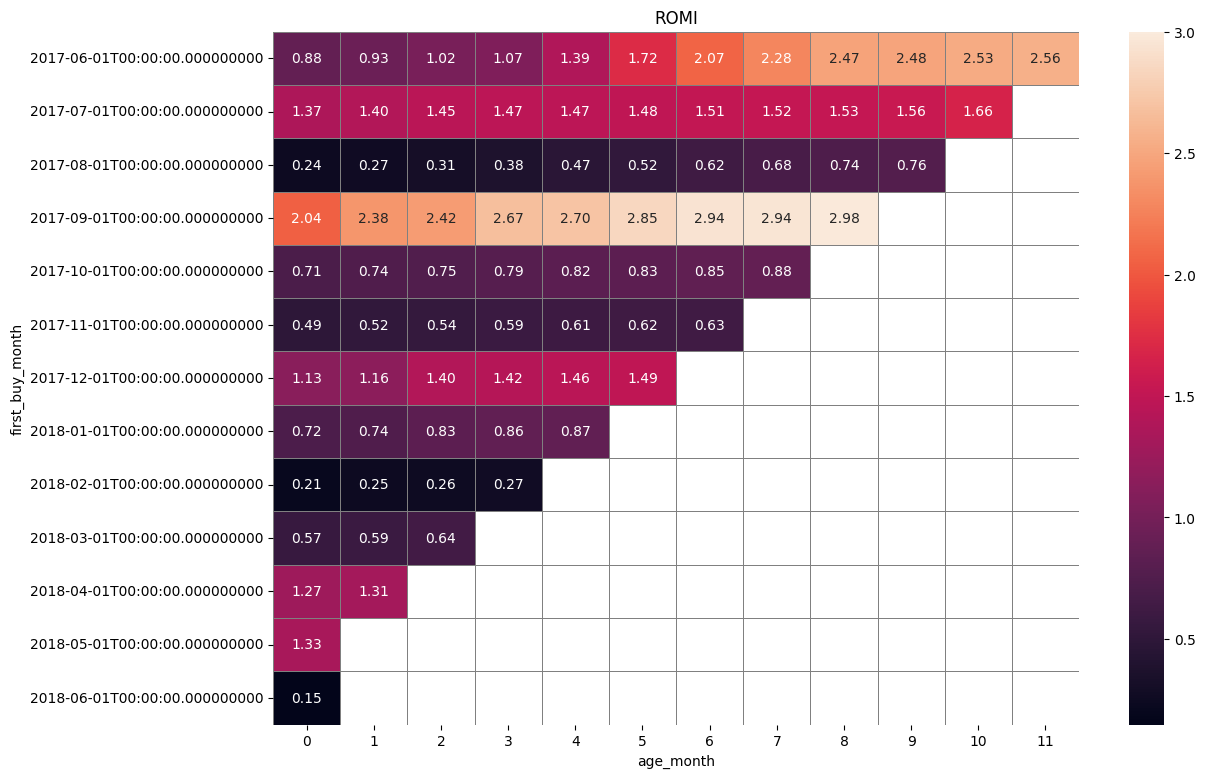

In [432]:
# Membuat visualisasi datanya
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(
    cohort_roi,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    linecolor='grey',
    vmax=3
) 

**Findings:**

Untuk kohort pertama yang membeli pada bulan Juni 2017, ROMI pada bulan pertama adalah 0.88, yang artinya pendapatan yang dihasilkan pada bulan pertama sudah melebihi biaya akuisisi. Pada bulan kedua, ROMI naik menjadi 0.93, menunjukkan adanya peningkatan pendapatan dan pengembalian investasi yang lebih baik. ROMI terus meningkat pada bulan-bulan berikutnya, dengan ROMI tertinggi mencapai 2.56 pada bulan ke-11.

Untuk kohort yang membeli pada bulan-bulan berikutnya, terlihat bahwa ROMI cenderung menurun seiring berjalannya waktu. Pada kohort yang membeli pada bulan Juli 2017, ROMI pada bulan pertama sudah naik menjadi 1.37, namun menurun pada bulan-bulan berikutnya. Hal yang sama terjadi pada kohort yang membeli pada bulan-bulan selanjutnya, di mana ROMI cenderung menurun seiring berjalannya waktu.

Kohort yang membeli pada bulan Agustus 2017 memiliki ROMI terendah pada bulan pertama, yaitu hanya 0.24, namun kemudian mengalami peningkatan pada bulan-bulan berikutnya.

Kohort yang membeli pada bulan September 2017 memiliki ROMI yang relatif stabil pada bulan-bulan awal, namun kemudian mengalami penurunan pada bulan-bulan terakhir.

Kesimpulannya, analisis kohort ROMI menunjukkan bahwa kohort pertama yang membeli pada bulan Juni 2017 menghasilkan pengembalian investasi yang lebih baik dibandingkan dengan kohort yang membeli pada bulan-bulan berikutnya. Pada kohort yang membeli pada bulan-bulan selanjutnya, ROMI cenderung menurun seiring berjalannya waktu. Oleh karena itu, perusahaan perlu mempertimbangkan strategi yang tepat untuk mempertahankan atau meningkatkan ROMI pada setiap kohort, seperti meningkatkan retensi pelanggan atau mengoptimalkan biaya akuisisi.

## Kesimpulan Umum <a id='end'></a>

*Dataset* yang dianalisa terkait data kunjungan, pesanan, dan pengeluaran. Pada tahap pra-pemrosesam data, telah dilakukan penggantian nama kolom dengan mengubahnya menjadi *lowercase* dan menggunakan *Snake Case*. Selain itu telah ditemukan anomali berupa 2 baris yang nilai `session_start`-nya lebih besar dari `session_end`, hal ini cuklup ganjil karena seharusnya waktu dimulainya sesi dilakukan sebelum waktu berakhirnya sesi, dansudah menghapus nilai tersebut. 

Tujuan utama analisa adalah mencari tahu sumber pemasaran yang paling optomal melalui 3 metrik yaitu produk, penjualan, dan pemasaran:

1. Produk:
    - Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?
    - Berapa jumlah sesi per harinya?
    - Berapa lama durasi untuk setiap sesi?
    - Seberapa sering pengguna kembali menggunakan produk?
2. Penjualan:
    - Kapan orang-orang mulai melakukan pembelian?
    - Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?
    - Berapa besaran rata-rata pembeliannya?
    - Berapa jumlah uang yang mereka kontribusikan? (LTV)
3. Pemasaran:
    - Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu
    - Berapa biaya akuisisi pelanggan dari masing-masing sumber?
    - Seberapa menguntungkannya investasi tersebut? (ROMI)

Setelah menganalisis datanya, dapat disimpulkan bahwa:

1. Produk:
    - Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?

        - Jumlah user yang menggunakan produk setiap hari adalah sebanyak **907** user.
        - Jumlah user yang menggunakan produk setiap minggu adalah sebanyak **5825** user.
        - Jumlah user yang menggunakan produk setiap bulan adalah sebanyak **23228** user.

        Temuan ini memberikan gambaran tentang seberapa sering pengguna mengakses produk dan dapat digunakan sebagai acuan dalam pengembangan strategi pemasaran serta perbaikan produk. Informasi ini dapat membantu perusahaan untuk memperkuat dan meningkatkan hubungan dengan pengguna setia, serta untuk menarik lebih banyak pengguna baru dengan melakukan penyesuaian atau peningkatan pada fitur dan fungsionalitas produk. Selain itu, hasil ini juga dapat menjadi indikator dalam mengukur performa dan pertumbuhan produk.

    - Berapa jumlah sesi per harinya?

        Rata-rata sesi yang dilakukan tiap pengguna adalah satu sesi perhari.

    - Berapa lama durasi untuk setiap sesi?

        - Rata-rata durasi sesi adalah **643** detik.
        - Median durasi sesi adalah **300** detik.
        - Modus durasi sesi adalah **60** detik.

        Temuan ini memberikan gambaran yang cukup jelas mengenai durasi sesi pengguna dan dapat digunakan sebagai acuan dalam melakukan evaluasi dan pengembangan layanan. Perusahaan dapat menggunakan informasi ini untuk meningkatkan pengalaman pengguna dan meningkatkan durasi sesi pada layanan mereka dengan menyesuaikan fitur dan fungsionalitas pada layanan.
        
    - Seberapa sering pengguna kembali menggunakan produk?

        Tingkat retensi rata-rata pengguna bulanan menunjukkan penurunan secara signifikan seiring dengan peningkatan jumlah bulan. Dalam data tersebut, pada bulan pertama, tingkat retensi pengguna mencapai 100% (angka dasar). Namun, pada bulan kedua, tingkat retensi pengguna menurun menjadi 5.36%, dan pada bulan ketiga, tingkat retensi pengguna menurun menjadi 4.29%.

        Pada bulan keempat, tingkat retensi pengguna terlihat meningkat menjadi 3.77%, namun kembali menurun pada bulan kelima menjadi 3.26%. Begitu seterusnya hingga bulan ke-12, di mana tingkat retensi pengguna turun menjadi 2.05%.

        Temuan ini menunjukkan bahwa penggunaan produk memiliki tingkat retensi yang rendah dalam jangka waktu yang lebih panjang. Perusahaan perlu melakukan peningkatan atau perbaikan pada produk agar pengguna lebih tertarik dan setia dalam menggunakan produk tersebut dalam jangka waktu yang lebih panjang. Perusahaan dapat melakukan pengembangan fitur dan fungsionalitas baru yang lebih menarik, serta memperbaiki kualitas produk dan pelayanan agar pengguna merasa puas dengan pengalaman menggunakan produk. Selain itu, perusahaan juga dapat melakukan program promosi atau penawaran yang menarik untuk mempertahankan pengguna.

2. Penjualan:
    - Kapan orang-orang mulai melakukan pembelian?

        - Kebanyakan pengguna melakukan pembelian di hari ke-0, artinya mereka melakukan pembelian pada hari yang sama saat sesi pertama dilakukan.
        - Rata-rata pengguna melakukan pembelian pertama setelah 16 hari semenjak sesi pertama dilakukan.
        - Waktu tercepat pengguna dalam melakukan pembelian adalah pada hari yang sama saat sesi pertama dilakukan.
        - Uniknya waktu maksimal pengguna dalam melakukan pembelian adalah pada hari ke 363, artinya mereka melakukan pembelian pada hari ke-363 atau hampir satu tahun setelah dilakukannya sesi pertama.

    - Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?

        Jumlah pesanan yang dibuat setiap bulannya mengalami fluktuasi yang cukup signifikan. Pada bulan-bulan awal, jumlah pesanan cenderung stabil, tetapi pada bulan Oktober 2017, terjadi kenaikan yang cukup signifikan dari sekitar 3.400 menjadi 5.679 pesanan. Hal ini mungkin disebabkan oleh faktor promosi atau kebijakan harga yang menarik pada bulan tersebut.

        Selanjutnya, jumlah pesanan cenderung menurun pada bulan-bulan berikutnya hingga Februari 2018, sebelum kembali meningkat pada bulan-bulan terakhir. Meski demikian, terlihat adanya fluktuasi pada data bulan Juni 2018, yang hanya tercatat satu pesanan dengan total pendapatan sebesar 3,42. Data ini mungkin perlu diverifikasi kembali untuk memastikan keakuratannya.

        Secara keseluruhan, terlihat adanya fluktuasi pada jumlah pesanan yang dibuat selama periode waktu retensi. Untuk mempertahankan pertumbuhan bisnis yang sehat, perlu dilakukan analisis yang lebih mendalam untuk mengidentifikasi faktor apa yang mempengaruhi fluktuasi ini dan bagaimana cara mengatasi fluktuasi tersebut.

    - Berapa besaran rata-rata pembeliannya?

        Rata-rata besaran pembelian pengguna adalah sebesar **5**.

    - Berapa jumlah uang yang mereka kontribusikan? (LTV)

        Dapat dilihat bahwa kohort pertama (yang melakukan pembelian pertama pada bulan Juni 2017) memiliki nilai LTV yang terus meningkat dari waktu ke waktu, dengan nilai tertinggi mencapai 11.88 pada bulan ke-11.

        Sementara itu, kohort-kohort berikutnya cenderung memiliki nilai LTV yang lebih rendah dibandingkan kohort pertama. Namun, kohort yang melakukan pembelian pertama pada bulan September 2017 memiliki nilai LTV yang sangat tinggi pada bulan ke-3, mencapai 11.26, kemudian menurun secara signifikan pada bulan ke-4 dan 5.

        Pada umumnya, nilai LTV untuk setiap kohort cenderung menurun dari waktu ke waktu, dengan beberapa kohort memiliki penurunan yang lebih signifikan dibandingkan kohort lainnya. Hal ini dapat disebabkan oleh faktor-faktor seperti perubahan preferensi konsumen, persaingan yang semakin ketat, dan faktor ekonomi yang memengaruhi keputusan konsumen dalam melakukan pembelian.

3. Pemasaran:
    - Berapa jumlah uang yang dihabiskan?

        jumlah uang yang dihabiskan secara keseluruhan adalah sebanyak 329131.62. Dengan sumber nomor 3 yang menjadi sumber dengan jumlah uang yang dihabiskan pelanggan tertinggi yaitu sebesar 141,321.63. Sumber nomor 2 juga memiliki jumlah uang yang cukup tinggi yaitu sebesar 42,806.04. Sedangkan sumber nomor 1, 4, dan 5 memiliki jumlah uang yang dihabiskan pelanggan yang relatif seimbang di antara ketiganya yaitu sekitar 20-60 ribu.

        Sumber nomor 9 dan 10 merupakan sumber dengan jumlah uang yang dihabiskan pelanggan paling rendah, yaitu sebesar 5,517.49 dan 5,822.49. Hal ini mungkin disebabkan oleh beberapa faktor, seperti kurangnya efektivitas promosi dari sumber tersebut, kurangnya popularitas, atau kurangnya kepercayaan dari pelanggan terhadap sumber tersebut.

    - Berapa biaya akuisisi pelanggan dari masing-masing sumber?

        - Sumber 1 memiliki CAC sebesar 9.49.
        - Sumber 2 memiliki CAC sebesar 16.29.
        - Sumber 3 memiliki CAC sebesar 15.58.
        - Sumber 4 memiliki CAC sebesar 7.27.
        - Sumber 5 memiliki CAC sebesar 8.34.
        - Sumber 9 memiliki CAC sebesar 6.84.
        - Sumber 10 memiliki CAC sebesar 6.56.

        Dari hasil analisis tersebut, dapat dilihat bahwa biaya akuisisi pelanggan (CAC) yang paling rendah dimiliki oleh sumber nomor 9 dan 10, yaitu sebesar 6.84 dan 6.56 masing-masingnya. Sementara itu, sumber nomor 2 memiliki CAC tertinggi, yaitu sebesar 16.29. Perusahaan dapat mempertimbangkan untuk lebih fokus pada sumber-sumber yang memiliki biaya akuisisi yang lebih rendah untuk mengoptimalkan pengeluaran dan memaksimalkan keuntungan.

    - Seberapa menguntungkannya investasi tersebut? (ROMI)

        Untuk kohort pertama yang membeli pada bulan Juni 2017, ROMI pada bulan pertama adalah 0.88, yang artinya pendapatan yang dihasilkan pada bulan pertama sudah melebihi biaya akuisisi. Pada bulan kedua, ROMI naik menjadi 0.93, menunjukkan adanya peningkatan pendapatan dan pengembalian investasi yang lebih baik. ROMI terus meningkat pada bulan-bulan berikutnya, dengan ROMI tertinggi mencapai 2.56 pada bulan ke-11.

        Untuk kohort yang membeli pada bulan-bulan berikutnya, terlihat bahwa ROMI cenderung menurun seiring berjalannya waktu. Pada kohort yang membeli pada bulan Juli 2017, ROMI pada bulan pertama sudah naik menjadi 1.37, namun menurun pada bulan-bulan berikutnya. Hal yang sama terjadi pada kohort yang membeli pada bulan-bulan selanjutnya, di mana ROMI cenderung menurun seiring berjalannya waktu.

        Kohort yang membeli pada bulan Agustus 2017 memiliki ROMI terendah pada bulan pertama, yaitu hanya 0.24, namun kemudian mengalami peningkatan pada bulan-bulan berikutnya.

        Kohort yang membeli pada bulan September 2017 memiliki ROMI yang relatif stabil pada bulan-bulan awal, namun kemudian mengalami penurunan pada bulan-bulan terakhir.

        Kesimpulannya, analisis kohort ROMI menunjukkan bahwa kohort pertama yang membeli pada bulan Juni 2017 menghasilkan pengembalian investasi yang lebih baik dibandingkan dengan kohort yang membeli pada bulan-bulan berikutnya. Pada kohort yang membeli pada bulan-bulan selanjutnya, ROMI cenderung menurun seiring berjalannya waktu. Oleh karena itu, perusahaan perlu mempertimbangkan strategi yang tepat untuk mempertahankan atau meningkatkan ROMI pada setiap kohort, seperti meningkatkan retensi pelanggan atau mengoptimalkan biaya akuisisi.

    

[Kembali ke Daftar Isi](#back)